In [ ]:
!pip install snscrape
!pip install pandas                                
!pip install textblob

In [ ]:
# import necessary libraries
import re
import nltk
import gensim
import pandas as pd

from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


In [ ]:
# Load the CSV file into a Pandas DataFrame
tweets_df = pd.read_csv('/content/drive/MyDrive/finalOutput12.csv', lineterminator='\n')

In [ ]:
tweets_df.head()

In [ ]:
!pip install plotly

In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
# create data frame of unique cluster/topic names only
topics_df = tweets_df[['cluster', 'topic_name']].drop_duplicates().sort_values(by='cluster')
topics_df.reset_index(inplace=True, drop=True)
topics_df

In [ ]:
n_topics = len(topics_df)
user_topic_counts = pd.pivot_table(data=tweets_df, 
                                   values='tweet', 
                                   index='hospital_name', 
                                   columns='cluster', 
                                   aggfunc='count',
                                   fill_value=0)

user_topic_counts.columns = ['Topic {}'.format(i) for i in range(n_topics)]
user_topic_counts

In [ ]:
# add column to sum total topics 
user_topic_counts['total_topics'] =  user_topic_counts.sum(axis=1)

# convert topic counts to percentages for each news source 
user_topic_counts_pct =  user_topic_counts.apply(lambda x: (x / user_topic_counts['total_topics']))
user_topic_counts_pct = user_topic_counts_pct.drop(columns=['total_topics'])
user_topic_counts_pct

In [ ]:
# store z-values
z_usr = user_topic_counts_pct.values.tolist()

# create list of hover text template strings for each z-value in matrix 
topic_names=topics_df.topic_name.tolist()
hovertext_usr = []
for yi, yy in enumerate(user_topic_counts_pct.index.tolist()):
    hovertext_usr.append(list())
    for xi, xx in enumerate(topic_names):
        hovertext_usr[-1].append('<b>Topic:</b> {}<br />'
                                 '<b>User:</b> {}<br />'
                                 '<b>Tweet Proportion:</b> {}'.format(xx, yy, z_usr[yi][xi]))

In [ ]:
import plotly.express as px

# plot heatmap
fig = px.imshow(user_topic_counts_pct, 
                color_continuous_scale="bluyl",
                width=650,
                height=500,
                aspect="auto",)
           
fig.update_layout(
    margin=dict(l=20, 
                r=0,  
                b=20, 
                t=10,
                pad=3),
    coloraxis=dict(colorbar=dict(thickness=15,
                                 xpad=2)))

fig.update_traces(
    hovertemplate=None, # set this to None in order to use custom hover text       
    text=hovertext_usr,
    hoverinfo="text") 
    
fig.show()

In [ ]:
import pandas as pd
import folium

# Read data from a CSV file
data = pd.read_csv('/content/drive/MyDrive/bolu1.csv')

# Create a map with initial zoom level
m = folium.Map(zoom_start=10)

#Preprocess sentimnet values
sentimnet_mapping = {
    'Dissatisfied': -1,
    'Not Dissatisfied': 1,
    'Nuetral': 0
}

data['Sentiment'] = data['Classification'].map(sentimnet_mapping)

# Iterate through the data and add markers with sentiment scores to the map
for _, row in data.iterrows():
    hospital = row['hospital_name']
    sentiment = row['Sentiment']
    latitude = row['Latitude']
    longitude = row['Longitude']
    
    # Choose a color for the marker based on the sentiment score
    if sentiment > 0:
        color = 'green'
    elif sentiment < 0:
        color = 'red'
    else:
        color = 'gray'
    
    # Create a marker and add it to the map
    folium.Marker(
        location=[latitude, longitude],
        popup=f'Hospital: {hospital}<br>Sentiment: {sentiment}',
        icon=folium.Icon(color=color)
    ).add_to(m)

# Fit the map bounds to include all markers
m.fit_bounds(m.get_bounds())

# Save the map to an HTML file
m.save('sentiment_map.html')


In [ ]:
!pip install geopandas

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Read data from CSV file
data = pd.read_csv('/content/drive/MyDrive/finalOutput12.csv')

# Create a GeoDataFrame from latitude, longitude, and sentiment score columns
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']))

# Read shapefile for the polygons (regions)
shapefile = '/content/drive/MyDrive/nga_polbnda_adm0_1m.shp'
regions = gpd.read_file(shapefile)

# Spatial join to assign sentiment scores to regions
joined_data = gpd.sjoin(regions, gdf, op='contains')

#Preprocess sentimnet values
sentimnet_mapping = {
    'Dissatisfied': -1,
    'Not Dissatisfied': 1,
    'Nuetral': 0
}

data['Sentiment'] = data['Classification'].map(sentimnet_mapping)

# Plot the choropleth map using sentiment scores and different hues
fig, ax = plt.subplots(figsize=(10, 10))
joined_data.plot(column='Sentiment', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set plot title and axis labels
plt.title('Choropleth Map of Sentiment Scores')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Read data from CSV file
data = pd.read_csv('/content/drive/MyDrive/finalOutput12.csv')

#Preprocess sentimnet values
sentimnet_mapping = {
    'Dissatisfied': -1,
    'Not Dissatisfied': 1,
    'Nuetral': 0
}

data['Sentiment'] = data['Classification'].map(sentimnet_mapping)

# Read shapefile for the polygons (regions)
shapefile = '/content/drive/MyDrive/nga_polbnda_adm0_1m.shp'
regions = gpd.read_file(shapefile)

# Merge the data with the regions based on a common identifier column
merged_data = regions.merge(data, left_on='identifier_column_in_shapefile', right_on='identifier_column_in_csv')

# Define a colormap for positive and negative sentiment scores
cmap = ListedColormap(['red', 'green'])

# Plot the choropleth map using positive and negative sentiment scores
fig, ax = plt.subplots(figsize=(10, 10))
merged_data.plot(column='Sentiment', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set plot title and axis labels
plt.title('Choropleth Map of Sentiment Scores')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Read data from CSV file
data = pd.read_csv('/content/drive/MyDrive/finalOutput12.csv')

#Preprocess sentimnet values
sentimnet_mapping = {
    'Dissatisfied': -1,
    'Not Dissatisfied': 1,
    'Nuetral': 0
}

data['Sentiment'] = data['Classification'].map(sentimnet_mapping)

# Read shapefile for the polygons (regions)
shapefile = '/content/drive/MyDrive/nga_polbnda_adm0_1m.shp'
regions = gpd.read_file(shapefile)

# Set a common index column for both datasets
regions['index_col'] = regions.index
data['index_col'] = data.index

# Merge the data with the regions based on a common index column
merged_data = regions.merge(data, on='index_col', how='left')

# Define a colormap for positive and negative sentiment scores
cmap = ListedColormap(['red', 'green'])

# Plot the choropleth map using positive and negative sentiment scores
fig, ax = plt.subplots(figsize=(10, 10))
merged_data.plot(column='Sentiment', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set plot title and axis labels
plt.title('Choropleth Map of Sentiment Scores')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()



In [ ]:
bdr1 = gpd.read_file('/content/drive/MyDrive/nigeria-lgas/new_lga_nigeria_2003.shx')

In [ ]:
print(bdr1)

         STATE          LGA      AREA  PERIMETER  LONGITUDE  LATITUDE  \
0       Sokoto         Gada  1193.977    170.095        NaN       NaN   
1       Sokoto       Illela  1298.423    174.726        NaN       NaN   
2       Sokoto      Tangaza  2460.715    209.702        NaN       NaN   
3        Borno       Abadam  2430.515    288.957        NaN       NaN   
4         Lake    Lake chad  5225.912    497.039        NaN       NaN   
..         ...          ...       ...        ...        ...       ...   
770      Delta  Isoko North   485.467    169.369        NaN       NaN   
771      Niger        Lavun  3951.431    424.153        NaN       NaN   
772       Yobe         Bade   817.260    216.207        NaN       NaN   
773    Zamfara         Maru  7795.261    536.500        NaN       NaN   
774  Akwa Ibom         Oron    81.472     57.846        NaN       NaN   

     FULL_NAME                                           geometry  
0          NaN  POLYGON ((5.53632 13.88793, 5.53480 13.

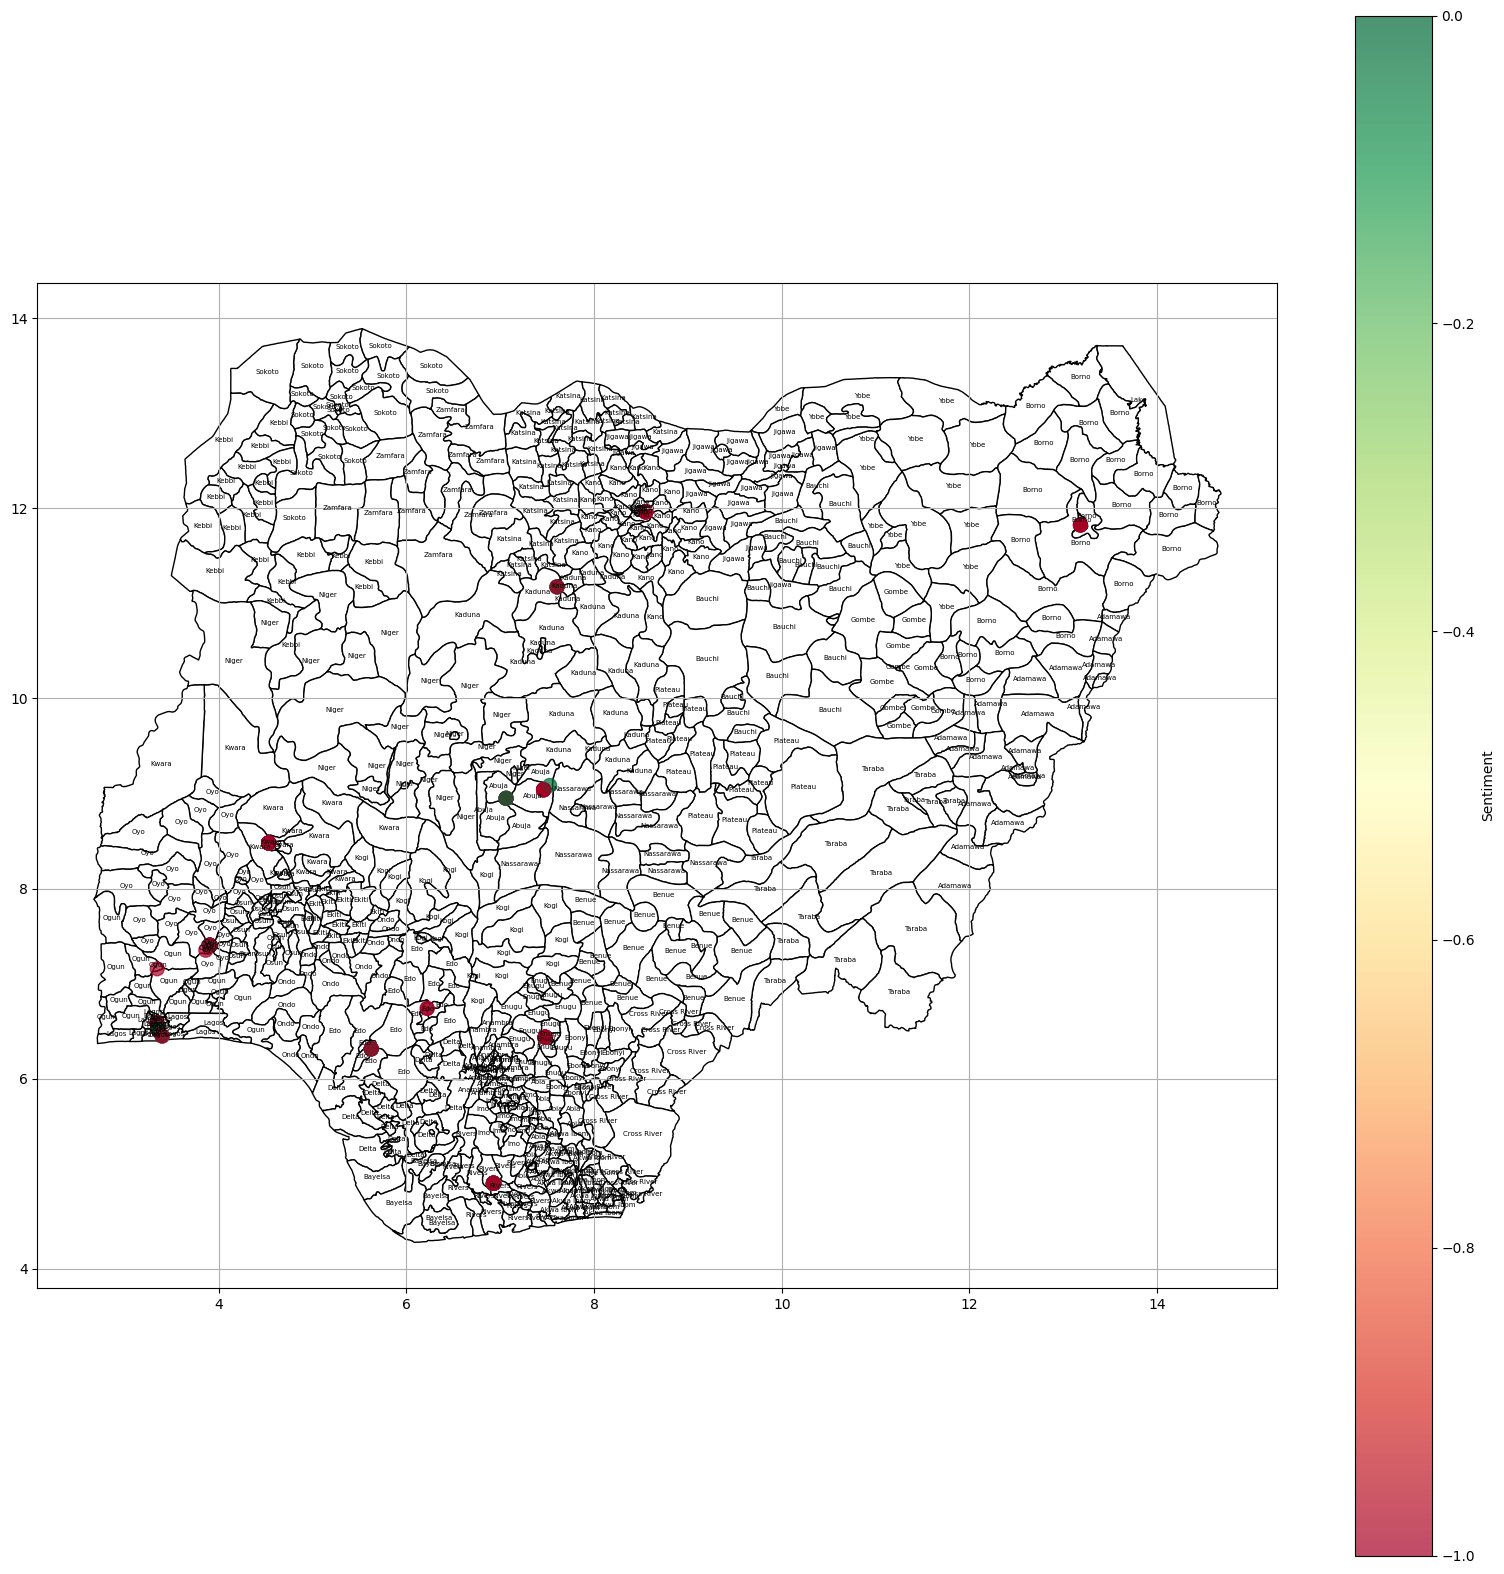

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the CSV file containing latitude, longitude, sentiment, and perceptions data
data = pd.read_csv('/content/drive/MyDrive/bolu1.csv')

#Preprocess sentimnet values
sentimnet_mapping = {
    'Dissatisfied': -1,
    'Not Dissatisfied': 1,
    'Nuetral': 0
}

data['Sentiment'] = data['Classification'].map(sentimnet_mapping)

# Extract latitude, longitude, sentiment, and perceptions columns from the DataFrame
latitude = data['Latitude']
longitude = data['Longitude']
sentiment = data['Sentiment']
perceptions = data['topic_name']

# Read the boundary data using GeoPandas
bdr1 = gpd.read_file('/content/drive/MyDrive/nigeria-lgas/new_lga_nigeria_2003.shx')

# Create the plot
fig, ax = plt.subplots(figsize=(20, 20))
bdr1.plot(ax=ax, edgecolor='black', color='white')

# Scatter plot for latitude and longitude data with fixed size and sentiment-based color
scatter = ax.scatter(x=longitude, y=latitude, c=sentiment, cmap='RdYlGn', alpha=0.7, s=100)

# Add a colorbar legend
cbar = plt.colorbar(scatter)
cbar.set_label('Sentiment')

# Add state names as labels
for idx, row in bdr1.iterrows():
    state_name = row['STATE']  # Replace 'STATE_NAME' with the correct column name
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, state_name, fontsize=5, ha='center')

# # Add perceptions as annotations near each scatter point
# for x, y, p in zip(longitude, latitude, perceptions):
#     ax.annotate(p, (x, y), xytext=(8, 8), textcoords='offset points', fontsize=8)

plt.grid()
plt.show()


In [ ]:
# Read the boundary data using GeoPandas
bdr1 = gpd.read_file('/content/drive/MyDrive/nigeria-lgas/new_lga_nigeria_2003.shx')

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127475 (\N{REGIONAL INDICATOR SYMBOL LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127468 (\N{REGIONAL INDICATOR SYMBOL LETTER G}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


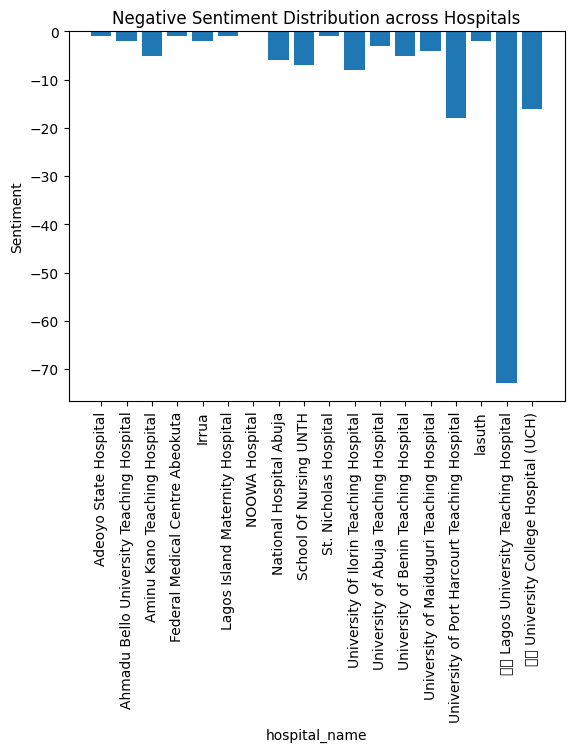

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file
df = pd.read_csv('/content/drive/MyDrive/bolu1.csv')

# Preprocess sentiment values
sentiment_mapping = {
    'Dissatisfied': -1,
    'Not Dissatisfied': 1,
    'Neutral': 0
}

df['Sentiment'] = df['Classification'].map(sentiment_mapping)

# Group the data by category and sum the values
grouped_df = df.groupby('hospital_name')['Sentiment'].sum().reset_index()

# Plot the bar chart
plt.bar(grouped_df['hospital_name'], grouped_df['Sentiment'])

# Add labels and title
plt.xlabel('hospital_name')
plt.ylabel('Sentiment')
plt.title('Negative Sentiment Distribution across Hospitals')

# Rotate x-labels vertically
plt.xticks(rotation='vertical')

# Display the plot
plt.show()
